In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)


In [11]:
x1_train = torch.FloatTensor([[73], [93], [89], [96], [73]])
x2_train = torch.FloatTensor([[80], [88], [91], [98], [66]])
x3_train = torch.FloatTensor([[75], [93], [90], [100], [70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

w1 = torch.zeros(1, requires_grad = True)
w2 = torch.zeros(1, requires_grad = True)
w3 = torch.zeros(1, requires_grad = True)
b = torch.zeros(1, requires_grad = True)

In [12]:
optimizer = optim.SGD([w1, w2, w3, b], lr=1e-5)

epochs = 1000

for e in range(epochs + 1) :
    hypothesis = x1_train*w1 + x2_train*w2 + x3_train*w3 + b
    
    cost = torch.mean((hypothesis - y_train)**2)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if e % 100 == 0:
        print('Epoch : {:4d}/{}  w1 : {:.3f}  w2 : {:.3f}  w3 : {:.3f}  b : {:.3f}  cost : {:.3f}'.format(
        e, epochs, w1.item(), w2.item(), w3.item(), b.item(), cost.item()))

Epoch :    0/1000  w1 : 0.294  w2 : 0.294  w3 : 0.297  b : 0.003  cost : 29661.801
Epoch :  100/1000  w1 : 0.674  w2 : 0.661  w3 : 0.676  b : 0.008  cost : 1.564
Epoch :  200/1000  w1 : 0.679  w2 : 0.655  w3 : 0.677  b : 0.008  cost : 1.498
Epoch :  300/1000  w1 : 0.684  w2 : 0.649  w3 : 0.677  b : 0.008  cost : 1.435
Epoch :  400/1000  w1 : 0.689  w2 : 0.643  w3 : 0.678  b : 0.008  cost : 1.376
Epoch :  500/1000  w1 : 0.694  w2 : 0.638  w3 : 0.678  b : 0.009  cost : 1.320
Epoch :  600/1000  w1 : 0.699  w2 : 0.633  w3 : 0.679  b : 0.009  cost : 1.266
Epoch :  700/1000  w1 : 0.704  w2 : 0.627  w3 : 0.679  b : 0.009  cost : 1.216
Epoch :  800/1000  w1 : 0.709  w2 : 0.622  w3 : 0.679  b : 0.009  cost : 1.168
Epoch :  900/1000  w1 : 0.713  w2 : 0.617  w3 : 0.680  b : 0.009  cost : 1.122
Epoch : 1000/1000  w1 : 0.718  w2 : 0.613  w3 : 0.680  b : 0.009  cost : 1.079


만약 x가 1000개고 w가 1000개면 각각 1000개씩 선언하고 
식을 적을 때도 곱셈을 1000번을 적어야한다.

이런 비효율적인 측면을 없애기 위해 행렬 곱셈 연산을 사용함
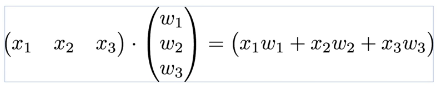

In [19]:
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  80], 
                               [96,  98,  100],   
                               [73,  66,  70]])  

y_train  =  torch.FloatTensor([[152],  
                               [185],  
                               [180],  
                               [196],  
                               [142]])

print(x_train.shape)
print(y_train.shape)

torch.Size([5, 3])
torch.Size([5, 1])


In [20]:
W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# matmul() => 행렬 곱셈
hypothesis = x_train.matmul(W) + b

In [22]:
optimizer = optim.SGD([W, b], lr = 1e-5)

epochs = 1000
for e in range(epochs + 1) :
    hypothesis = x_train.matmul(W) + b
    
    cost = torch.mean((hypothesis - y_train) ** 2)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if e % 100 == 0:
        print('Epoch : {:4d}/{}  w1 : {:.3f}  w2 : {:.3f}  w3 : {:.3f}  b : {:.3f}  cost : {:.3f}'.format(
        e, epochs, w1.item(), w2.item(), w3.item(), b.item(), cost.item()))

Epoch :    0/1000  w1 : 0.718  w2 : 0.613  w3 : 0.680  b : 0.005  cost : 9537.694
Epoch :  100/1000  w1 : 0.718  w2 : 0.613  w3 : 0.680  b : 0.008  cost : 5.752
Epoch :  200/1000  w1 : 0.718  w2 : 0.613  w3 : 0.680  b : 0.008  cost : 5.510
Epoch :  300/1000  w1 : 0.718  w2 : 0.613  w3 : 0.680  b : 0.008  cost : 5.279
Epoch :  400/1000  w1 : 0.718  w2 : 0.613  w3 : 0.680  b : 0.008  cost : 5.060
Epoch :  500/1000  w1 : 0.718  w2 : 0.613  w3 : 0.680  b : 0.008  cost : 4.850
Epoch :  600/1000  w1 : 0.718  w2 : 0.613  w3 : 0.680  b : 0.008  cost : 4.651
Epoch :  700/1000  w1 : 0.718  w2 : 0.613  w3 : 0.680  b : 0.009  cost : 4.460
Epoch :  800/1000  w1 : 0.718  w2 : 0.613  w3 : 0.680  b : 0.009  cost : 4.279
Epoch :  900/1000  w1 : 0.718  w2 : 0.613  w3 : 0.680  b : 0.009  cost : 4.106
Epoch : 1000/1000  w1 : 0.718  w2 : 0.613  w3 : 0.680  b : 0.009  cost : 3.940


CNN에서 convolution을 통과한 output은 높은 차원의 배열값이 된다.
그리고 output과 대응되는 weight들도 엄청나게 많은 값이 있을 것이다.

이것을 행렬로 표현하게되면 위의 예처럼 아주 쉽게 표현이 된다!
